# Image classification with Convolutional Neural Networks (CNNs)

In [ ]:
# Library om YouTube videos te importeren 

from IPython.display import YouTubeVideo, Image

One of the most groundbreaking uses of deep neural networks over the past decade has been in image processing and computer vision. A form of neural network, known as the "convolutional neural network" (CNN) has been particularly significant in the field of computer vision.

CNNs are built to handle 2-dimensional data. CNNs are particularly good at handling image data because they are designed to leverage the inherent spatial structure and correlation in images.

## 1 How do CNNs work?

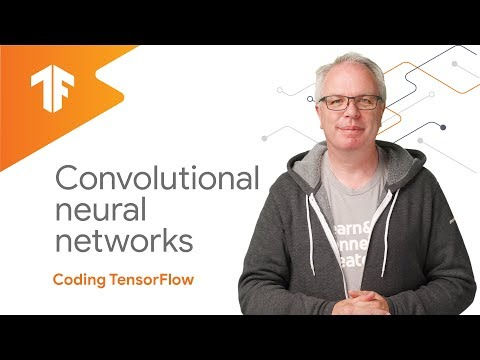

In [ ]:
YouTubeVideo("x_VrgWTKkiM", width=800, height=500)

In a CNN, the input image is fed into a series of filters, which are essentially small grids of numbers that are used to scan across the image. As each filter moves across the image, it performs a mathematical operation known as a convolution, which involves multiplying the values in the filter by the corresponding pixel values in the image, summing the results, and producing a single output value.

First, CNNs use convolutional filters to scan across the input image and extract features, such as edges and textures. These filters are able to capture local patterns and features regardless of their location within the image. This makes CNNs **translation invariant**, meaning that they can recognize the same pattern regardless of its position in the image.

Second, CNNs use pooling layers to downsample the features extracted from the image, which helps to **reduce the dimensionality** of the data and make the model more computationally efficient. This also helps the model to be robust to small variations in the input, such as slight rotations or translations.

Finally, CNNs are able to automatically learn features and representations of the input data during the training process, which makes them highly adaptable to different types of images and tasks. This means that CNNs can be trained on a relatively small amount of data and still achieve high accuracy, which is particularly useful in scenarios where large amounts of labeled data are not available.

![Convolution](cnn_demo.gif)

## 2 A basic image classifier using a CNN

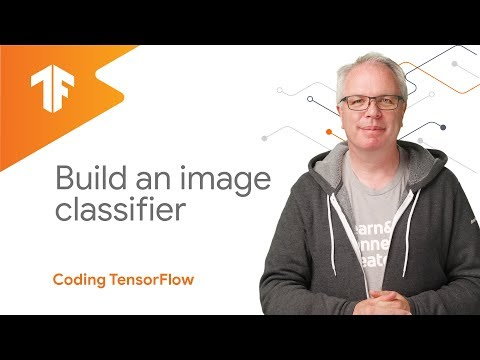

In [ ]:
YouTubeVideo("u2TjZzNuly8", width=800, height=500)

In this part of the notebook we are going to build an image classifier using TensorFlow and Keras, for the same dataset of handwritten digits that we classified using a fully-connected network. Remember, with the full connected network we were able to reach an accuracy of about 95%. Let's see what we can achieve by using **convolutional layers** in our network. Convolutional layers take advantage of spatial relations and correlations between nearby pixels in the image to gain a better understanding of the image data. They also use fewer parameters, since the weights in the convolutional layers are shared between pixels, unlike in a fully-connected network where each pixel has its own set of weights.

### 2.1 Setup

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### 2.2 Prepare the data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### 2.3 Build the model

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),                           # An input layer with the shape of the image data
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"), # A convolutional layer with 32 filters and ReLU activation
        layers.MaxPooling2D(pool_size=(2, 2)),                    # A maxpooling layer
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"), # A convolutional layer with 64 filters and ReLU activation
        layers.MaxPooling2D(pool_size=(2, 2)),                    # A maxpooling layer
        layers.Flatten(),                                         # Flattening to convert from 2D to 1D
        layers.Dense(128, activation='relu'),                     # A dense hidden layer
        layers.Dense(num_classes),                                # The output layer with 10 classes and linear activation
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

### 2.4 Train the model

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 52s 119ms/step - loss: 0.2210 - accuracy: 0.9367 - val_loss: 0.0694 - val_accuracy: 0.9795
Epoch 2/15
422/422 [==============================] - 51s 121ms/step - loss: 0.0590 - accuracy: 0.9816 - val_loss: 0.0519 - val_accuracy: 0.9863
Epoch 3/15
422/422 [==============================] - 48s 115ms/step - loss: 0.0413 - accuracy: 0.9874 - val_loss: 0.0386 - val_accuracy: 0.9900
Epoch 4/15
422/422 [==============================] - 51s 120ms/step - loss: 0.0309 - accuracy: 0.9902 - val_loss: 0.0364 - val_accuracy: 0.9903
Epoch 5/15
422/422 [==============================] - 48s 113ms/step - loss: 0.0242 - accuracy: 0.9927 - val_loss: 0.0401 - val_accuracy: 0.9888
Epoch 6/15
422/422 [==============================] - 49s 116ms/step - loss: 0.0194 - accuracy: 0.9935 - val_loss: 0.0394 - val_accuracy: 0.9872
Epoch 7/15
422/422 [==============================] - 49s 116ms/step - loss: 0.0150 - accuracy: 0.9951 - val_loss: 0.0381 - val_ac

### 2.5 Evaluate the model and visualize the results

In [ ]:
import matplotlib.pyplot as plt

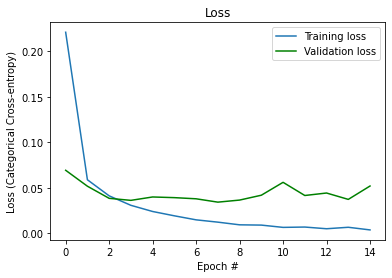

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], 'g', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss (Categorical Cross-entropy)')
plt.title('Loss')
plt.legend()

In [ ]:
# Evaluate model on test set

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03452672064304352
Test accuracy: 0.9907000064849854


Remember that n the previous notebook, with a fully-connected network, you achieved around 95% accuracy on the test set. The addition of convolutional layers has bumped it up to between 98% and 99% accuracy!

## Exercises

#### Question 1

It is once again time to test your skills on the Fashion MNIST dataset. This time, use some convolutional layers at the start of your network. Remember the accuracy that you managed to achieve with the Fashion MNIST dataset in the previous notebook with a fully-connected network. Your goal is to beat that accuracy, using a convolutional neural network.

In [6]:
# Getting the data

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


#### a) Visualize the images in the dataset and explore the labels.

In [7]:
indices = np.random.choice(len(train_images), size=9, replace=False)

for count, value in enumerate(indices):
    plt.subplot(3, 3, count+1)
    plt.imshow(train_images[value], cmap="gray")
    plt.title(train_labels[value])

plt.tight_layout()
plt.show()

NameError: ignored

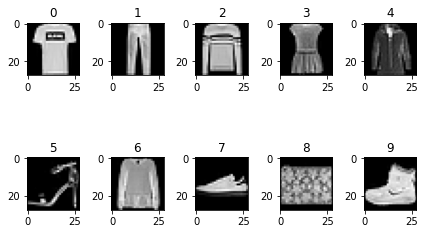

In [ ]:
for i in range(0,10):
    plt.subplot(2,5, i+1)
    plt.imshow(train_images[train_labels == i][0], cmap="gray")
    plt.title(train_labels[train_labels == i][0])
plt.tight_layout()
plt.show()

#### b) Build a neural network to classify the images. Use convolutional layers at the start of the network. Use an appropriate loss and optimizer to compile it.

In [8]:
num_classes = 10
input_shape = (28, 28, 1)

train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

In [9]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),                           
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"), # A convolutional layer with 32 filters and ReLU activation
        layers.MaxPooling2D(pool_size=(2, 2)),                    # A maxpooling layer
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"), # A convolutional layer with 64 filters and ReLU activation
        layers.MaxPooling2D(pool_size=(2, 2)),                    # A maxpooling layer
        layers.Flatten(),                                         # Flattening to convert from 2D to 1D
        layers.Dense(128, activation='relu'),                     # A dense hidden layer
        layers.Dense(num_classes),                                # The output layer with 10 classes and linear activation
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

#### c) Train your model.

In [ ]:
batch_size = 128
epochs = 5

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.1),
              metrics=["accuracy"])

history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 54s 127ms/step - loss: 1.3094 - accuracy: 0.5666 - val_loss: 0.7697 - val_accuracy: 0.7192
Epoch 2/5
422/422 [==============================] - 49s 116ms/step - loss: 0.7524 - accuracy: 0.7245 - val_loss: 0.6816 - val_accuracy: 0.7460
Epoch 3/5
422/422 [==============================] - 49s 116ms/step - loss: 0.6573 - accuracy: 0.7551 - val_loss: 0.6612 - val_accuracy: 0.7162
Epoch 4/5
422/422 [==============================] - 49s 116ms/step - loss: 0.6020 - accuracy: 0.7761 - val_loss: 0.5578 - val_accuracy: 0.7895
Epoch 5/5
422/422 [==============================] - 50s 118ms/step - loss: 0.5585 - accuracy: 0.7912 - val_loss: 0.5303 - val_accuracy: 0.8072


#### d) Evaluate your model on the test dataset. Visualize the loss curve. What is the final loss of your model? What is the test set accuracy? How does this accuracy compare to random guessing on this dataset? How does this accuracy compare to the accuracy with the fully-connected network in the precious notebook?

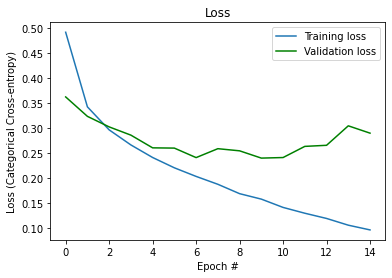

In [ ]:
# i had 0.345 test loss and 0.87 test accuracy on the fully-connected network
# accuracy was 91% after 10 epochs with loss of 0.2386

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], 'g', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss (Categorical Cross-entropy)')
plt.title('Loss')
plt.legend()

In [ ]:
# Evaluate model on test set

score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.29531940817832947
Test accuracy: 0.9100000262260437
